In [1]:
import pandas as pd
import numpy as np

In [2]:
# Create a sample time series DataFrame
data = {'y_t': [10,12,15,13,16,18,17, 20,22, 21]}
df = pd.DataFrame(data, index = pd.date_range(start='2025-7-16', end = '2025-7-25', freq="D"))

# Create a lagged version of the time series (y_{t-1})
# The `shift(1)` method moves the data down by one row
df['y_{t-1}'] = df['y_t'].shift(1)

# Display the DataFrame to see the lagged values
print('DataFrame wiht Lagged Values:')
df

DataFrame wiht Lagged Values:


,y_t,y_{t-1}
2025-07-16,10,NaN
2025-07-17,12,10.0
2025-07-18,15,12.0
2025-07-19,13,15.0
2025-07-20,16,13.0
2025-07-21,18,16.0
2025-07-22,17,18.0
2025-07-23,20,17.0
2025-07-24,22,20.0
2025-07-25,21,22.0


In [3]:
# Import the models we'll be using in this section
from statsmodels.tsa. stattools import acovf, acf, pacf, pacf_yw, pacf_ols

## ACF (Autocorrelation Function)

In [4]:
def autocorrelation(y, lag=1):
  n = len(y)
  y_mean = sum(y)/n

  numerator = sum((y[t] - y_mean) * (y[t-lag] - y_mean) for t in range(lag, n))
  denominator = sum((y[t] - y_mean) ** 2 for t in range(n))

  return numerator/denominator

In [5]:
((df['y_t'] - df['y_t'].mean()) * (df['y_{t-1}'] - df['y_t'].mean())).sum()

np.float64(88.84)

In [6]:
((df['y_t'] - df['y_t'].mean()) * (df['y_{t-1}'] - df['y_t'].mean())).sum()

np.float64(88.84)

In [7]:
((df['y_t'] - df['y_t'].mean()) * (df['y_t'] - df['y_t'].mean())).sum()

np.float64(142.4)

In [8]:
88.84/142.4

0.623876404494382

In [9]:
for i in range(1,10):
  print(autocorrelation(df['y_t'], lag=i))

0.6238764044943822
0.3123595505617978
0.20730337078651692
-0.08735955056179776
-0.2724719101123596
-0.30308988764044953
-0.38005617977528094
-0.39382022471910116
-0.2067415730337079


/tmp/ipython-input-937139067.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  numerator = sum((y[t] - y_mean) * (y[t-lag] - y_mean) for t in range(lag, n))
/tmp/ipython-input-937139067.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  denominator = sum((y[t] - y_mean) ** 2 for t in range(n))


In [10]:
from statsmodels.tsa.stattools import acf
acf(df['y_t'])

array([ 1.        ,  0.6238764 ,  0.31235955,  0.20730337, -0.08735955,
       -0.27247191, -0.30308989, -0.38005618, -0.39382022, -0.20674157])

## PACF (Partial Autocorrelation Function)

In [11]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [12]:
def pacf_ols(y, max_lag):
  y = np.asarray(y)
  n = len(y)
  pacf_vals = []

  for lag in range(1, max_lag + 1):
    # Create lagged predictors: y_{t-1} to y_{t-lag}
    X = np.column_stack([y[lag-i-1: n-i-1] for i in range(lag)])
    y_target = y[lag:]

    model = LinearRegression().fit(X, y_target)
    pacf_vals.append(model.coef_[-1])  # last coefficient is PACF at this lag

  return pacf_vals

In [13]:
pacf_ols(df['y_t'].values, max_lag=1)

[np.float64(0.774766355140187)]

In [14]:
y = df['y_t'].values
n = len(y)
lag = 1

In [15]:
np.column_stack([y[lag - i - 1 : n - i - 1] for i in range(lag)])

array([[10],
       [12],
       [15],
       [13],
       [16],
       [18],
       [17],
       [20],
       [22]])

In [16]:
lag = 1
[y[lag - i -1 : n - i -1] for i in range(lag)]  # df['y_{t-1}']

[array([10, 12, 15, 13, 16, 18, 17, 20, 22])]

In [17]:
y[lag:]  # df['y_t']

array([12, 15, 13, 16, 18, 17, 20, 22, 21])

In [18]:
pd.DataFrame(df['y_{t-1}'].iloc[1:])

,y_{t-1}
2025-07-17,10.0
2025-07-18,12.0
2025-07-19,15.0
2025-07-20,13.0
2025-07-21,16.0
2025-07-22,18.0
2025-07-23,17.0
2025-07-24,20.0
2025-07-25,22.0


In [19]:
model = LinearRegression()
model.fit(pd.DataFrame(df['y_{t-1}'].iloc[1:]), df['y_t'].iloc[1:])

LinearRegression()

In [20]:
model.coef_

array([0.77476636])

In [21]:
from statsmodels.tsa.stattools import pacf
pacf(df['y_t'], nlags=1, method = 'ols')

array([1.        , 0.77476636])

In [22]:
df

,y_t,y_{t-1}
2025-07-16,10,NaN
2025-07-17,12,10.0
2025-07-18,15,12.0
2025-07-19,13,15.0
2025-07-20,16,13.0
2025-07-21,18,16.0
2025-07-22,17,18.0
2025-07-23,20,17.0
2025-07-24,22,20.0
2025-07-25,21,22.0


<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

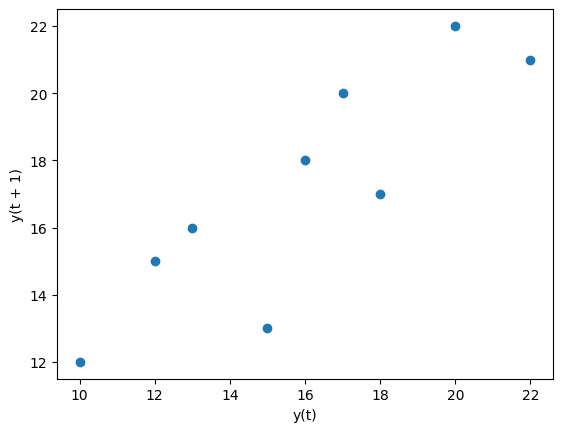

In [23]:
pd.plotting.lag_plot(df['y_t'],lag = 1)

In [24]:
# Using airline passenger dataset (monthly totals)
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv'
df = pd.read_csv(url, parse_dates = ['Month'], index_col = 'Month')
df

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [26]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

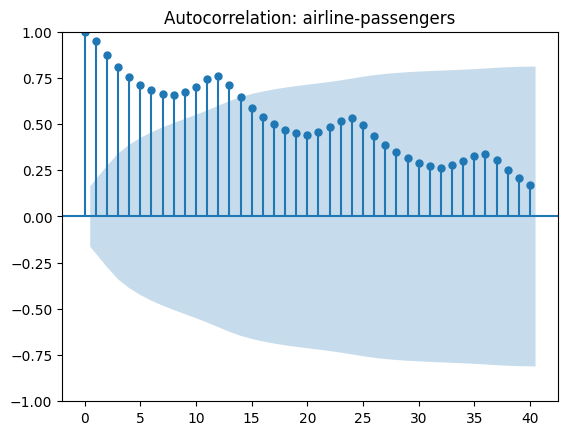

In [28]:
# Now let's plot the autocorrelation at different lags
title = 'Autocorrelation: airline-passengers'
lags = 40
plot_acf(df, title=title, lags= lags);

In [29]:
female_birth = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-total-female-births.csv'
df2 = pd.read_csv(female_birth, parse_dates = ['Date'], index_col = 'Date')
df2

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44
...,...
1959-12-27,37
1959-12-28,52
1959-12-29,48


<Axes: xlabel='Date'>

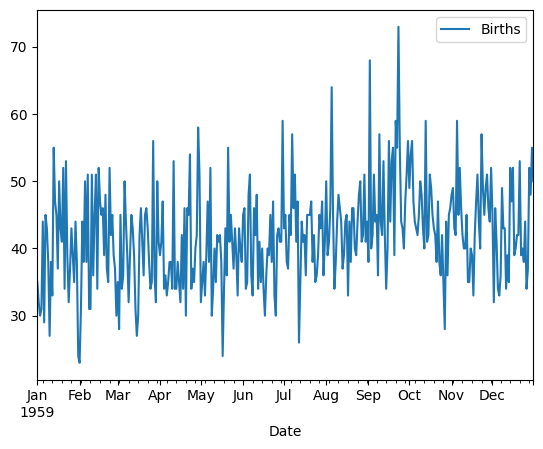

In [30]:
df2.plot()

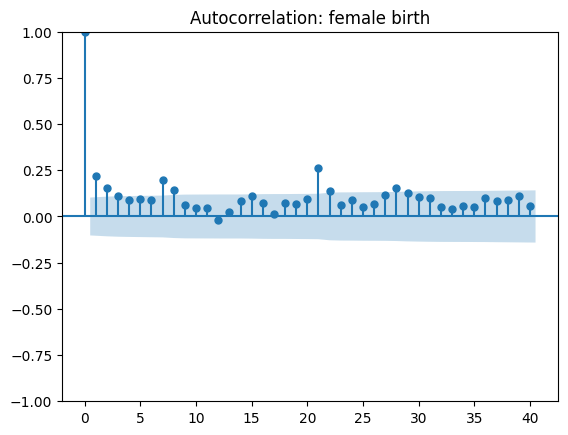

In [32]:
# Now let's plot the autocorrelation at different lags
title = 'Autocorrelation: female birth'
lags = 40
plot_acf(df2, title= title, lags = lags);